In [11]:
import pandas as pd
import json
import numpy as np
import matplotlib.pyplot as plt

In [1]:
dfs = []
with open('output_random.json') as f:
    for line in f.readlines():
        json_data = pd.json_normalize(json.loads(line))
        dfs.append(json_data)
fedcs_df = pd.concat(dfs, sort=False) # or sort=True depending on your needs

NameError: name 'pd' is not defined

In [ ]:
fedcs_df

In [22]:
df_server_rounds = fedcs_df[['server_round', 'client_name']].groupby(['server_round']).count().reset_index()
df_server_round_timeout_failures = fedcs_df[fedcs_df.reason == 'timeout failure'][['server_round', 'client_name']].groupby(['server_round']).count().reset_index()
df_server_round_reliability_failures = fedcs_df[fedcs_df.reason == 'reliability failure'][['server_round', 'client_name']].groupby(['server_round']).count().reset_index()
df_server_round_success = fedcs_df[fedcs_df.status == 'success'][['server_round', 'client_name']].groupby(['server_round']).count().reset_index()

In [26]:
df_server_rounds

,server_round,client_name
0,0,200
1,1,198
2,2,200
3,3,200
4,4,200
5,5,200
6,6,200
7,7,200
8,8,200
9,9,200


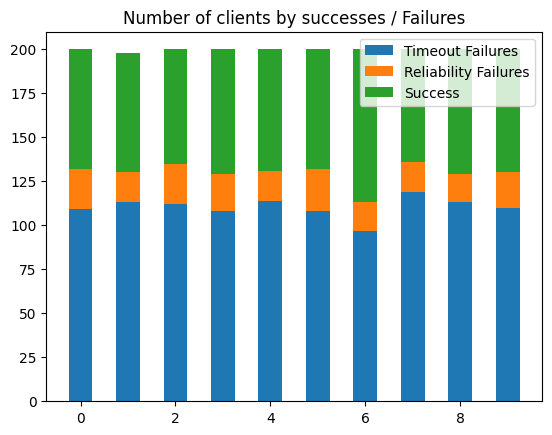

In [25]:

species = np.array(df_server_rounds['server_round'])
weight_counts = {
    "Timeout Failures": np.array(df_server_round_timeout_failures['client_name']),
    "Reliability Failures": np.array(df_server_round_reliability_failures['client_name']),
    "Success": np.array(df_server_round_success['client_name'])
}
width = 0.5

fig, ax = plt.subplots()
bottom = np.zeros(10)

for boolean, weight_count in weight_counts.items():
    p = ax.bar(species, weight_count, width, label=boolean, bottom=bottom)
    bottom += weight_count

ax.set_title("Number of clients by successes / Failures")
ax.legend(loc="upper right")

plt.show()